## In this project, I will use adult census income dataset(https://www.kaggle.com/datasets/uciml/adult-census-income) from kaggle to practice ML modeling by predicting income. 

## 1.1 Objectives
In this project, I will focus on learning the followings:

- Perform basic data preprocessing to make the data trainable
- Visualize the data to see the relationship between features
- Split the dataset into train, test dataset
- Train the model using Random Forest Classifier
- Use Gridsearch cross validation method to perform hyperparameter tuning

## 1.2 Project process
1. Read in the data and feature engineer the data
2. Visualize the relationship between features using heatmap
3. Train with RandomForestClassifier
4. Hyperparameter tuning with GridSearchCV

### Project Limitation
In the real world scenario, there could be more feature engineering, EDA, and compare the performance among different models. However, for this project's purpose, I am just using Random Forest Model to get accustomed to ML process.

## 1. Load the data and feature engineer data

### Read the data

In [133]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
# Read in the dataset downloaded from kaggle
df = pd.read_csv('income.csv')

In [135]:
# observe columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [136]:
# Take a look at dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Feature Engineering with One-hot Encoding

In [137]:
# List of columns to one-hot encode
columns_to_encode = ['occupation', 'workclass', 'marital-status','relationship',\
                    'race','native-country']

# Apply one-hot encoding to the selected columns and add prefix
for col in columns_to_encode:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col).astype(int)], axis=1)

In [138]:
# Drop unnecessary columns
df = df.drop(['education','fnlwgt'], axis=1)

In [139]:
# Income variation
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [140]:
# Tranasform gender, income columns to 1, 0 values
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x== '>50K' else 0)

## 2. Visualize the data

### Visualize the relationship using heatmap

<Axes: >

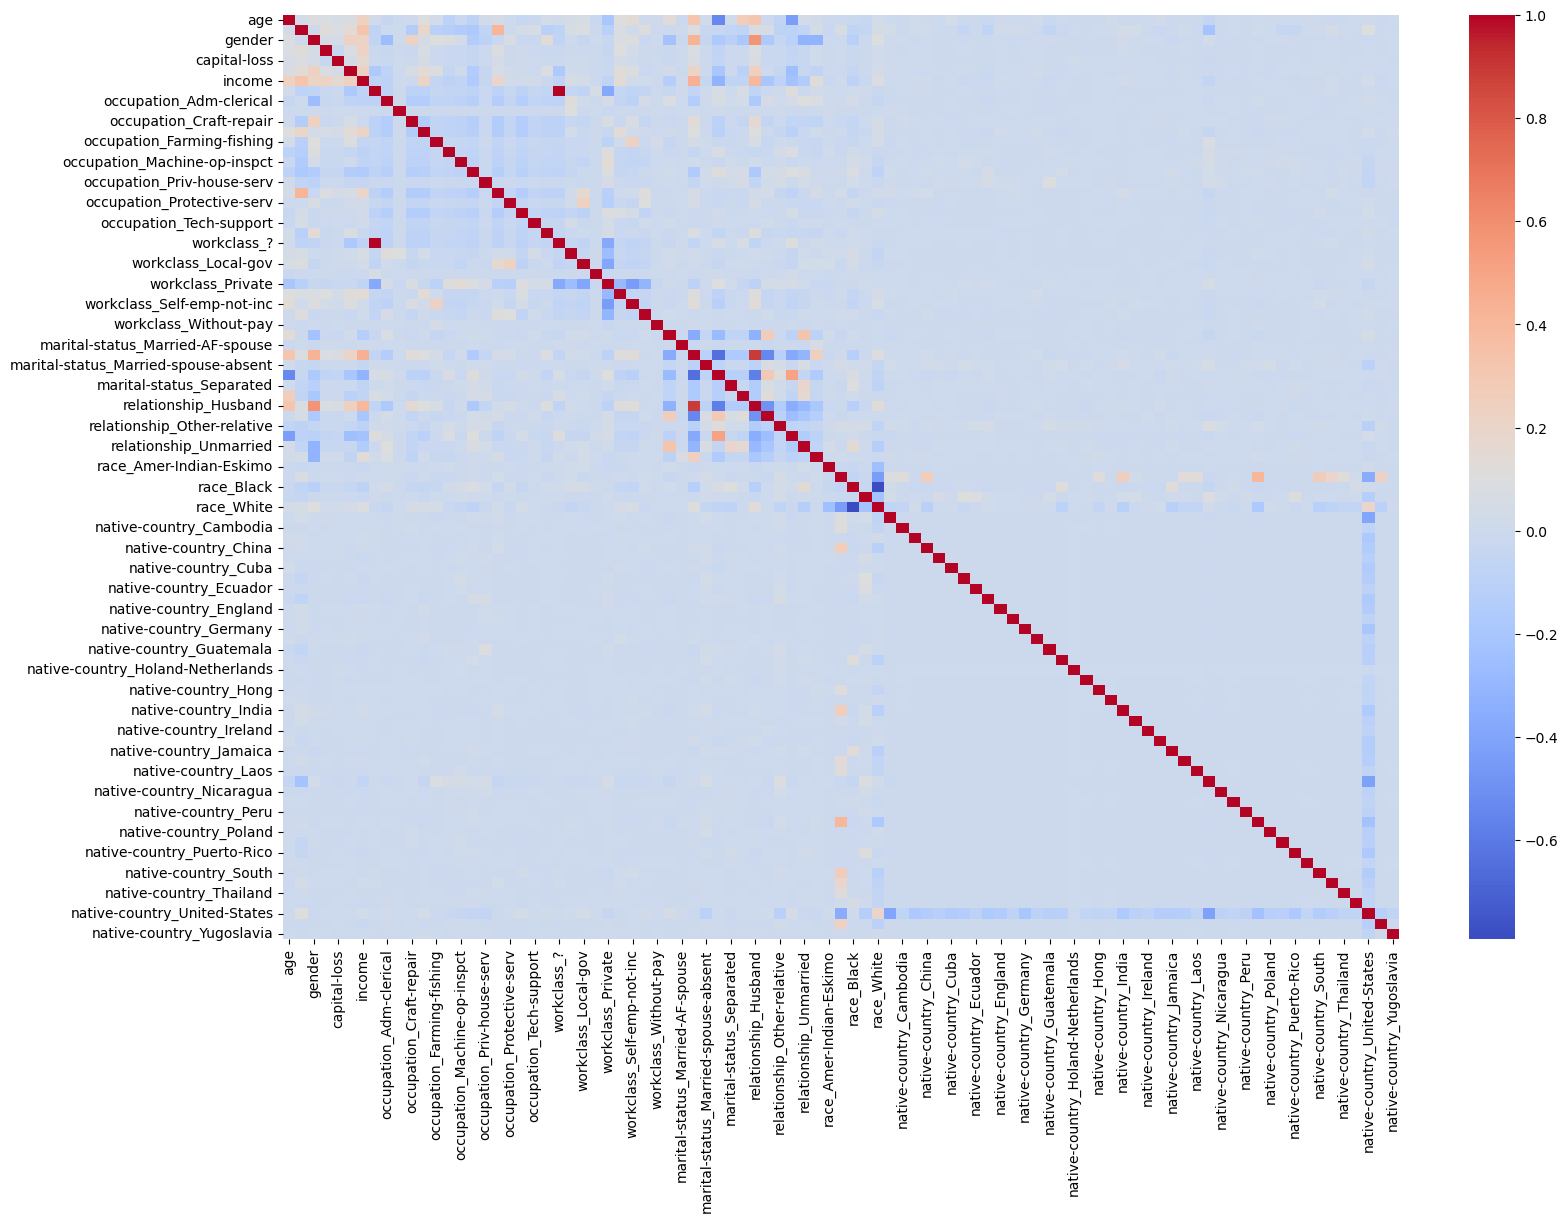

In [141]:
# Heatmap for all features
plt.subplots(1,1, figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [142]:
# Get top 20% features strongly correlated with income (target var)
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [106]:
df.corr()['income']

age                               0.230369
educational-num                   0.332613
gender                            0.214628
capital-gain                      0.223013
capital-loss                      0.147554
                                    ...   
native-country_Thailand          -0.004219
native-country_Trinadad&Tobago   -0.009107
native-country_United-States      0.032551
native-country_Vietnam           -0.015542
native-country_Yugoslavia         0.005522
Name: income, Length: 91, dtype: float64

<Axes: >

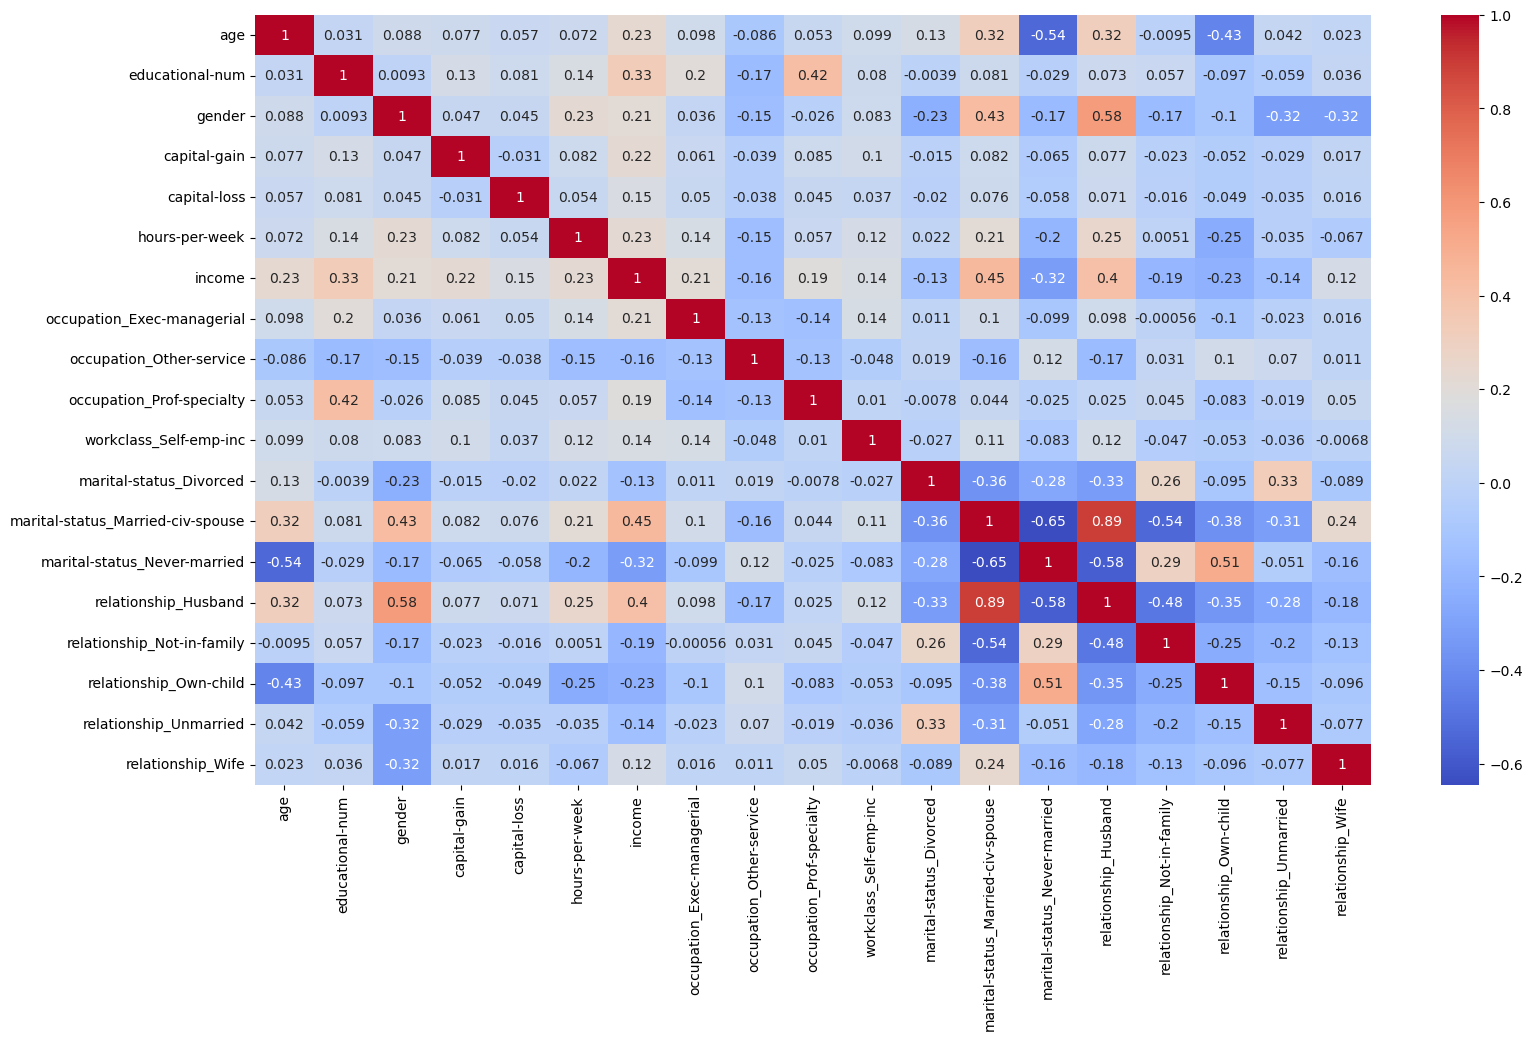

In [143]:
# Draw another heatmap with only 20% features
plt.subplots(1,1, figsize=(18,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

## 3. Train with RDF model

In [144]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Train Test Split data

In [145]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [146]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

### Train the data with RandomForestClassifier

In [147]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [112]:
forest.score(test_X, test_y)

0.8489098167673252

### Check out the feature importances

In [148]:
# Map feature names with feature importance scores
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
importances

{'age': 0.2261017900378503,
 'educational-num': 0.12525723521498894,
 'hours-per-week': 0.11397185954098414,
 'capital-gain': 0.11364068245016144,
 'marital-status_Married-civ-spouse': 0.07163434837546737,
 'relationship_Husband': 0.048939699248419,
 'capital-loss': 0.03737215621822591,
 'marital-status_Never-married': 0.030873448119944042,
 'occupation_Exec-managerial': 0.022513380849829515,
 'occupation_Prof-specialty': 0.018034762804985796,
 'gender': 0.011558353708046072,
 'relationship_Not-in-family': 0.009941161270449741,
 'workclass_Private': 0.009334298786475514,
 'marital-status_Divorced': 0.008434006476857884,
 'relationship_Own-child': 0.008185199123023533,
 'workclass_Self-emp-not-inc': 0.008146989978694084,
 'relationship_Wife': 0.00779054811778971,
 'occupation_Other-service': 0.007540357302650492,
 'native-country_United-States': 0.006462542678303465,
 'workclass_Self-emp-inc': 0.006357948337909311,
 'occupation_Sales': 0.0060026253438126955,
 'occupation_Craft-repair': 

## 4. Hyperparameter Tuning

In [120]:
# Define the hyperparameter lists

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100, 250],
    'max_depth' : [5, 10, 30, None],
    'min_samples_split' : [2, 4],
    'max_features': ['sqrt','log2']
}

In [121]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [122]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   1.1s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.7s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.7s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.832 total time=   0.7s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [127]:
forest = grid_search.best_estimator_

In [128]:
forest.score(test_X, test_y)

0.8625243115979118

In [129]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}